# Linear Regression on Ecommerce data

Linear Regression on Ecommerce data analysis 

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

In [116]:
customers = pd.read_csv("Customers")

In [117]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [118]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [119]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


# Data Visualisation

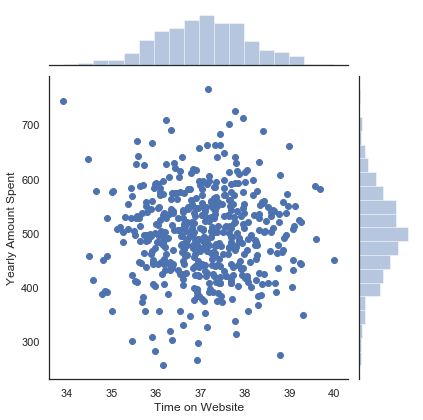

In [120]:
sns.set_palette("GnBu_d")
sns.set(style='white', color_codes=True)
sns.jointplot(x ='Time on Website',y='Yearly Amount Spent', data=customers)

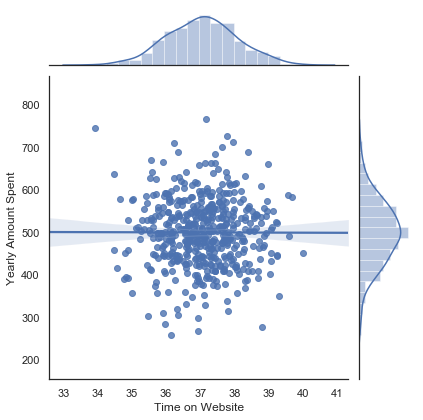

In [121]:
b = sns.jointplot(x = 'Time on Website', y='Yearly Amount Spent', data=customers, kind="reg")

C:\Users\Makinde\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


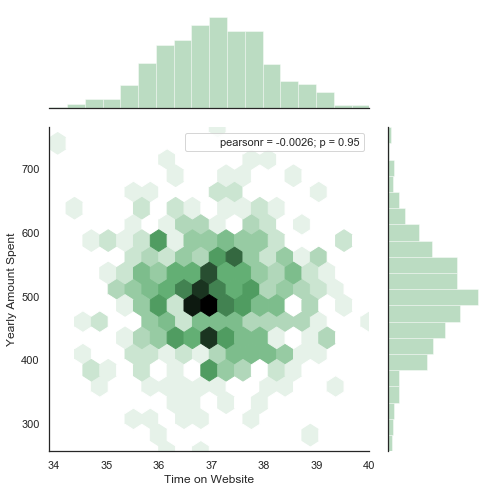

In [122]:
g = (sns.jointplot(x='Time on Website',y='Yearly Amount Spent', data=customers, kind="hex", height=7, ratio = 3, color="g"))
g.annotate(stats.pearsonr)

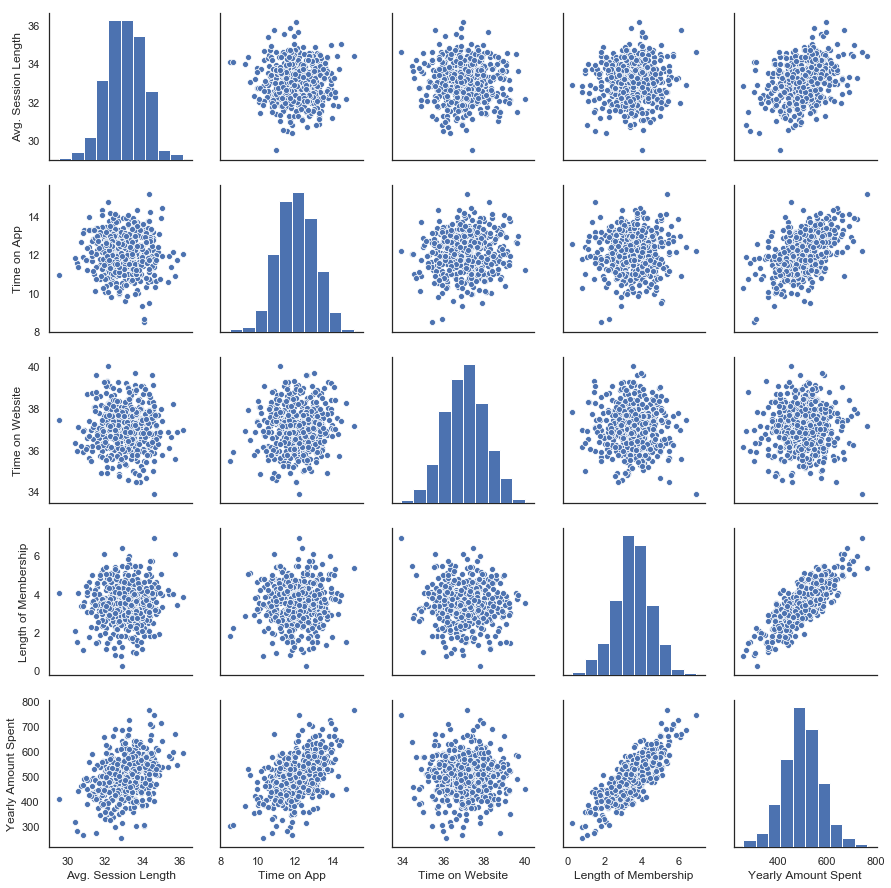

In [123]:
g = sns.pairplot(customers)

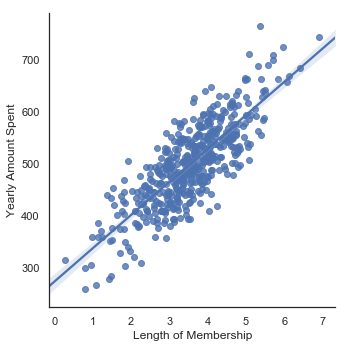

In [124]:
g = sns.lmplot(x="Length of Membership", y="Yearly Amount Spent", data=customers)

# Training and Testing 

In [125]:
from sklearn.linear_model import LinearRegression

y = customers[['Yearly Amount Spent']]

X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [127]:
lm = LinearRegression()

In [128]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [129]:
lm.coef_

array([[25.98154972, 38.59015875,  0.19040528, 61.27909654]])

# Prediction 

In [130]:
pred = lm.predict(X_test)

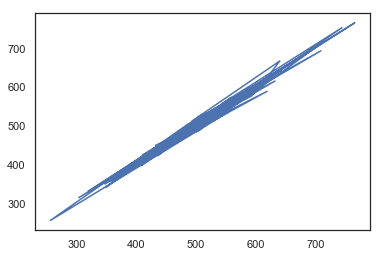

In [131]:
plt.plot(y_test,pred)

Text(0, 0.5, 'Predicted Value')

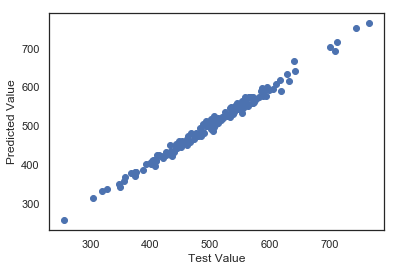

In [132]:
plt.scatter(y_test,pred)
plt.xlabel('Test Value')
plt.ylabel('Predicted Value')

# Evaluation

In [110]:
from sklearn import metrics

#Mean absolute Error
metrics.mean_absolute_error(y_test,pred)

79.81305165097467

In [133]:
#Mean square Error
metrics.mean_squared_error(y_test, pred)

79.81305165097467

In [134]:
#Root Mean Square Error
np.sqrt(metrics.mean_squared_error(y_test, pred))

8.933815066978646

# Residuals

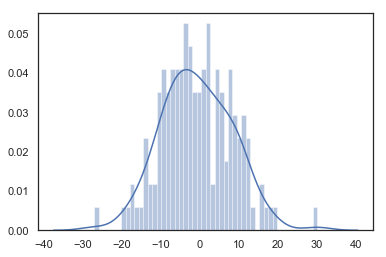

In [135]:
sns.distplot((y_test-pred), bins=50)